<a href="https://colab.research.google.com/github/prathamj937/Image-Classification-Using-Deep-Learning/blob/main/happy_or_sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import imghdr
import cv2
import matplotlib.pyplot as plt

/tmp/ipython-input-1-3973851165.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
img_exts = ["jpg","jpeg","png","bmp"]
data = "/content/drive/MyDrive/data"

In [3]:
os.listdir(os.path.join(data,"happy"))

['Happy-people-800x533.jpg',
 'group-of-happy-people-2.jpg',
 'getty_494581822_130796.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 'images13.jpg',
 'happy-people.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'HappyPeopleBanner.png',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'happy-people-13772392.jpg',
 'happy-girl-in-leaves.jpg',
 '154006829.jpg',
 'images2.jpg',
 '8cxKy5g9i.jpg',
 'images3.jpg',
 'iStock-1212931050.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 'Happy_People_Happy_Man.jpg',
 'image6.jpeg',
 '1902540.jpg',
 'images12.jpg',
 '60632274._UY200_.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'image2.jpeg',
 'images19.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 'images6.jpg',
 'hdptcar-fi-2.jpg',
 'maxresdefault.jpg',
 'happy-people-14410042.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 'image.jpeg',
 'happy-people-group-fb.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'images16.jpg',
 'image30.jpeg

In [4]:
imgg = cv2.imread(os.path.join(data,"happy","1-2.jpg"))
print(imgg)

[[[221 227 226]
  [221 227 226]
  [221 227 226]
  ...
  [238 245 238]
  [238 245 238]
  [238 245 238]]

 [[220 226 225]
  [220 226 225]
  [220 226 225]
  ...
  [238 245 238]
  [238 245 238]
  [238 245 238]]

 [[220 226 225]
  [220 226 225]
  [220 226 225]
  ...
  [237 244 237]
  [237 244 237]
  [237 244 237]]

 ...

 [[ 77  82 115]
  [ 95 100 133]
  [112 122 162]
  ...
  [128 124 119]
  [128 124 119]
  [128 124 119]]

 [[ 91  89 118]
  [ 75  73 102]
  [ 64  68 109]
  ...
  [126 122 117]
  [126 122 117]
  [126 122 117]]

 [[ 96  94 123]
  [ 81  79 108]
  [ 52  56  97]
  ...
  [125 121 116]
  [124 120 115]
  [124 120 115]]]


In [5]:
imgg.shape

(350, 590, 3)

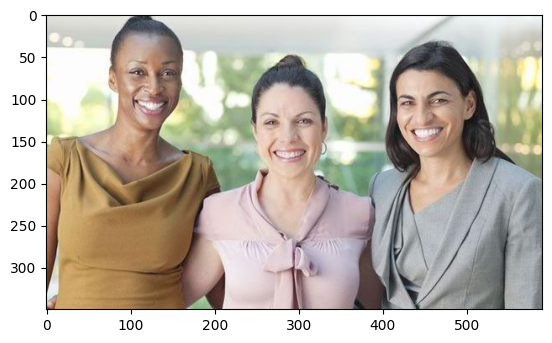

In [6]:
plt.imshow(cv2.cvtColor(imgg,cv2.COLOR_BGR2RGB))

In [7]:
for image_class in os.listdir(data):
  for image in os.path.join(data,image_class):
    image_path = os.path.join(data,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except:
      print("Issue with image {}".format(image_path))

Issue with image /
Issue with image /content/drive/MyDrive/data/happy/c
Issue with image /content/drive/MyDrive/data/happy/o
Issue with image /content/drive/MyDrive/data/happy/n
Issue with image /content/drive/MyDrive/data/happy/t
Issue with image /content/drive/MyDrive/data/happy/e
Issue with image /content/drive/MyDrive/data/happy/n
Issue with image /content/drive/MyDrive/data/happy/t
Issue with image /
Issue with image /content/drive/MyDrive/data/happy/d
Issue with image /content/drive/MyDrive/data/happy/r
Issue with image /content/drive/MyDrive/data/happy/i
Issue with image /content/drive/MyDrive/data/happy/v
Issue with image /content/drive/MyDrive/data/happy/e
Issue with image /
Issue with image /content/drive/MyDrive/data/happy/M
Issue with image /content/drive/MyDrive/data/happy/y
Issue with image /content/drive/MyDrive/data/happy/D
Issue with image /content/drive/MyDrive/data/happy/r
Issue with image /content/drive/MyDrive/data/happy/i
Issue with image /content/drive/MyDrive/da

In [8]:
import numpy as np
import matplotlib as plt

In [9]:
data_dir = "/content/drive/MyDrive/data"  # Define a new variable for the data directory path
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [53]:
tf.keras.utils.image_dataset_from_directory??

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
batch[0].shape

(32, 256, 256, 3)

In [14]:
data = data.map(lambda x,y: (x/255,y))

In [15]:
data_itr = data.as_numpy_iterator()

In [16]:
batch = data_itr.next()

In [17]:
batch[0].max()

np.float32(1.0)

In [18]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

AttributeError: module 'matplotlib' has no attribute 'subplots'

In [19]:
len(data)

10

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
val_size

2

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
!pip install tensorflow keras

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
logs = "/content/logs"

In [30]:
callbacks = tf.keras.callbacks.TensorBoard(log_dir=logs)

In [31]:
model_history = model.fit(train,epochs=20,validation_data=val, callbacks=[callbacks])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 565ms/step - accuracy: 0.5259 - loss: 1.0876 - val_accuracy: 0.7031 - val_loss: 0.6549
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 919ms/step - accuracy: 0.5422 - loss: 0.6742 - val_accuracy: 0.5625 - val_loss: 0.6505
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 741ms/step - accuracy: 0.5880 - loss: 0.6102 - val_accuracy: 0.8906 - val_loss: 0.5240
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7114 - loss: 0.5651 - val_accuracy: 0.6719 - val_loss: 0.5353
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 637ms/step - accuracy: 0.7823 - loss: 0.4746 - val_accuracy: 0.7969 - val_loss: 0.4133
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.7816 - loss: 0.4257 - val_accuracy: 0.8281 - val_loss: 0.3319
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8808 - loss: 0.3151 - val_accuracy: 0.8750 - val_loss: 0.3338
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 857ms/step - accuracy: 0.9107 - loss: 0.2631 - val_accuracy: 0.9219 - val_loss: 0.27

In [33]:
import matplotlib.pyplot as plt

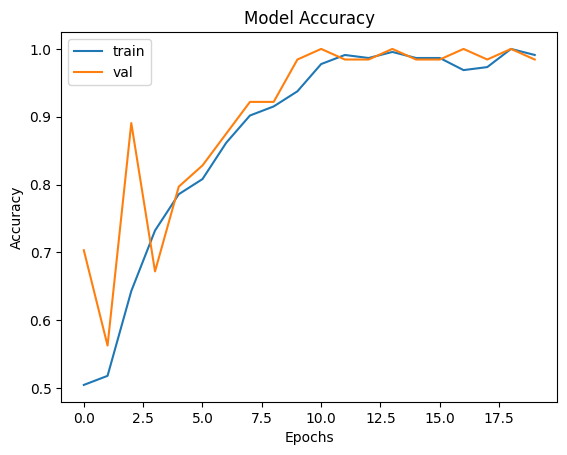

In [34]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train","val"])

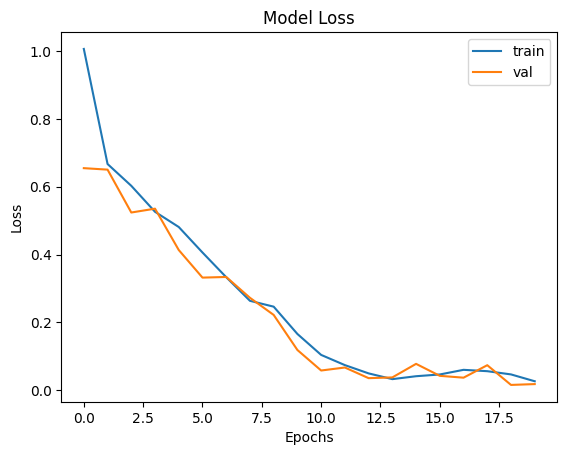

In [35]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","val"])

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [99]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [100]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
